<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/basic_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar el archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV
data = pd.read_csv(ruta_archivo)

In [2]:
# Paso 2: Análisis Exploratorio
# Puedes imprimir información básica sobre el conjunto de datos
print("Información del conjunto de datos:")
print(data.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usa

In [3]:
data = data.dropna()

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    object 
 5    autoempleado            480 non-null    object 
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    object 
 12   estado_prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB
None


## clasificación binaria
### Advantages of Random Forest

Handling of Non-linear Data: Random Forest can capture complex, non-linear relationships without requiring transformations of the input data, making it powerful for a wide range of problems.

Versatility: It can be used for both *classification* and *regression* tasks with good performance in many scenarios.

Handling of Missing Values: Random Forest can handle missing values in the data. While the handling isn't always optimal without preprocessing, it's more robust than many algorithms that require complete data.

Minimal Preprocessing: Random Forest requires less data preprocessing compared to algorithms like Support Vector Machines or Neural Networks. It does not require feature scaling (normalization or standardization).

Feature Importance: It provides insights into which features are most important for making predictions, which can be valuable for understanding the problem or for feature selection in later modeling.

Robustness to Overfitting: Thanks to the ensemble approach (combining multiple models), Random Forests are less prone to overfitting compared to individual decision trees, especially when the forest includes a large number of trees.

Ease of Use: With libraries like scikit-learn, Random Forests are straightforward to implement and require only minimal tuning of parameters to achieve reasonable performance in many cases.

In [5]:
# Visualizar las primeras filas del conjunto de datos
print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y
5,LP001011,Hombre,Si,2,Graduado,Si,5417,4196.0,267.0,360.0,1.0,Urbano,Y


In [6]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Uso algunas variables del conjunto de datos
X = data[[" ingresos_solicitante", " historial_crediticio", " monto_prestamo"]]
# Estado del préstamo es si o no, por lo que es un problema de clasificación binaria
y = data[' estado_prestamo'] # TARGET

In [7]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    ingresos_solicitante  480 non-null    int64  
 1    historial_crediticio  480 non-null    float64
 2    monto_prestamo        480 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.0 KB
None


In [8]:
data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

### supervised learning model

In [9]:
# Dividir el conjunto de datos en entrenamiento y prueba
# Seed: random_state=42, para reproducibilidad de los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.72


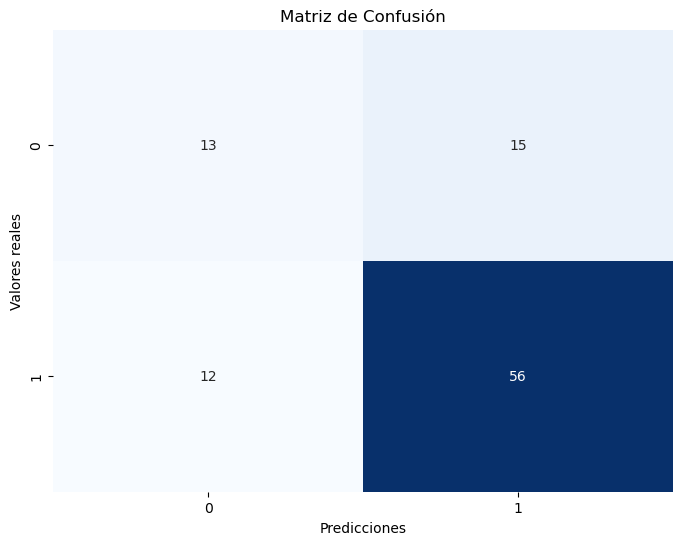


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.52      0.46      0.49        28
           Y       0.79      0.82      0.81        68

    accuracy                           0.72        96
   macro avg       0.65      0.64      0.65        96
weighted avg       0.71      0.72      0.71        96



In [10]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
# This line computes the confusion matrix, which is a table used to describe 
# the performance of a classification model. It shows the actual versus predicted values 
# in a matrix format, making it easier to visualize true positives, 
# false positives, true negatives, and false negatives.
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [11]:
# Paso 6: Guardar el modelo entrenado
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)
    
# Paso 7: Cargar el modelo entrenado
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)
    

# Ejercicio
### Predecir si un préstamo será aprobado o no utilizando otras variables del conjunto de datos

In [58]:
data_modified = data.copy()
data_modified["Married"] = data_modified["Married"].replace({"Si": 1, "No": 0})
data_modified[" autoempleado"] = data_modified[" autoempleado"].replace({"Si": 1, "No": 0})
data_modified[" educacion"] = data_modified[" educacion"].replace({"Graduado": 1, "Not Graduado": 0})

data_modified


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
1,LP001003,Hombre,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Hombre,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urbano,1
3,LP001006,Hombre,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urbano,1
4,LP001008,Hombre,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urbano,1
5,LP001011,Hombre,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urbano,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,FeHombre,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Hombre,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Hombre,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urbano,1
612,LP002984,Hombre,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urbano,1


In [69]:
data_columns = data.columns
data_columns = data_columns.drop([" estado_prestamo", "ID", "Genero"])
print(data_columns)

Index(['Married', 'dependientes', ' educacion', ' autoempleado',
       ' ingresos_solicitante', ' ingresos_cosolicitante', ' monto_prestamo',
       ' plazo_prestamo', ' historial_crediticio', ' area_propiedad'],
      dtype='object')


In [63]:
X = data_modified[[" ingresos_solicitante", " historial_crediticio", "Married", " autoempleado", " educacion"]]
y = data_modified[' estado_prestamo']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_v2 = RandomForestClassifier(random_state=42)
modelo_v2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo: 0.77


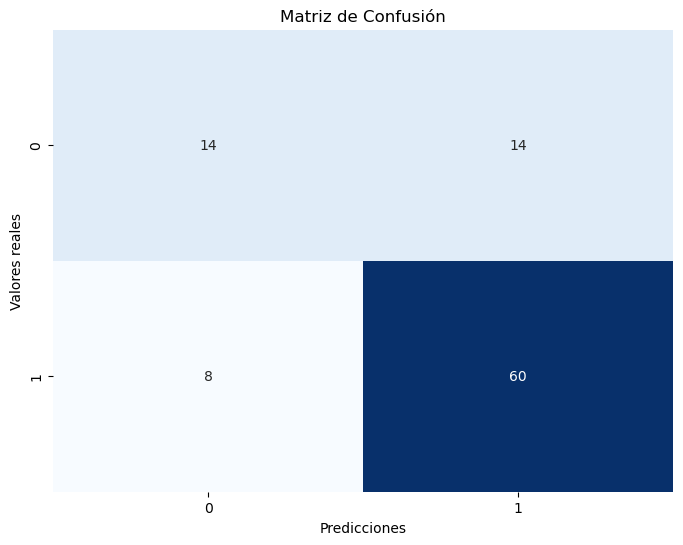


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        28
           1       0.81      0.88      0.85        68

    accuracy                           0.77        96
   macro avg       0.72      0.69      0.70        96
weighted avg       0.76      0.77      0.76        96



In [64]:
# Paso 5: Evaluación del modelo
y_pred = modelo_v2.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)